# Perspective Transformation
**Author**: James Chen, School of Animal Sciences, Virginia Tech

**Date**: July 21, 2022

<center><img src="transformation.png" width="800"/></center>

## Load modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

We can define a xy-coordinate matrix, $P\in \mathbb{R}^{3\times p}$, where $p$ is the number of coordinates, as below:

$$
P = \begin{bmatrix}
        x\\    y\\   1
    \end{bmatrix}
\tag{1}
$$


In [20]:
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4
P = np.array([x, y, i])
print("P \n", P)

P 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]


Visualize P

(0.0, 50.0)

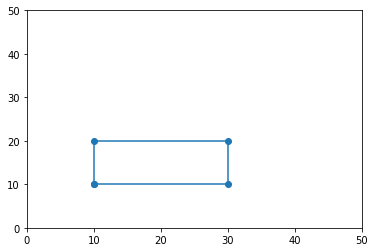

In [120]:
x, y, _ = P
# to complete a shape, append the array by the first element
x = np.append(x, x[0])
y = np.append(y, y[0])
# use 'o' to mark each data point
plt.plot(x, y, marker='o')
# set boundaries
plt.xlim(0, 50)
plt.ylim(0, 50)

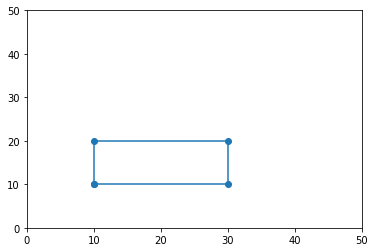

In [121]:
def plot_shape(P, label=""):
    """_summary_

    Parameters
    ----------
    P : _type_
        _description_
    """
    x, y, _ = P
    x = np.append(x, x[0])
    y = np.append(y, y[0])
    plt.plot(x, y, marker='o', label=label)
    plt.xlim(0, 50)
    plt.ylim(0, 50)

# test our function
plot_shape(P)

### Move a set of points

P: 
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]
Phat: 
 [[25 45 45 25]
 [25 25 35 35]
 [16 16 16 16]]


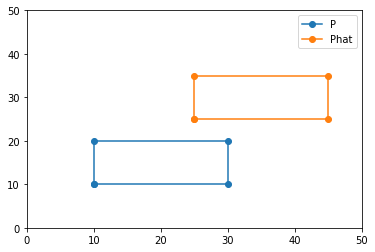

In [125]:
# intuitively move the entire matrix
Phat = P + 15
print("P: \n", P)
print("Phat: \n", Phat)
# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()


$$
\begin{split}
x + 0y + t_x &= x' \\
0x + y + t_y &= y' \\
0x + 0y + 1 &= 1
\tag{2}
\end{split}
$$

To move the matrix $P$ to $\hat{P}$
$$
\begin{bmatrix}
    x' \\ y' \\ 1
\end{bmatrix}
=
\begin{bmatrix}
    1 & 0 & t_x \\
    0 & 1 & t_y \\
    0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
    x \\ y \\ 1
\end{bmatrix}

\tag{3}
$$

Or

$$
\hat{P}
=
\begin{bmatrix}
    I & t \\
    0^T & 1
\end{bmatrix}
P

\tag{4}
$$

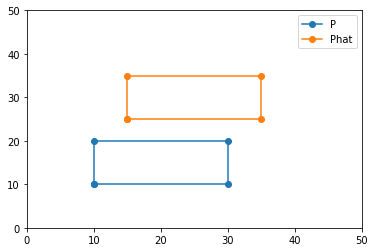

In [123]:
def move_shape(P, tx, ty):
    t = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    return np.matmul(t, P)

Phat = move_shape(P, tx=5, ty=15)
# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

### Rotate a set of points

$$
\hat{P}
=
\begin{bmatrix}
    R & t \\
    0^T & 1
\end{bmatrix}
P
\tag{5}
$$

where

$$
R =
\begin{bmatrix}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} & \cos{\theta}
\end{bmatrix}
\tag{6}
$$


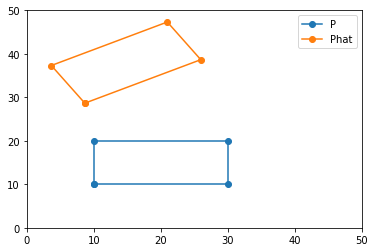

In [124]:
def move_shape_v2(P, tx, ty, angle=0):
    radian = angle * np.pi / 180
    t = np.array([[np.cos(radian), -np.sin(radian), tx],
                  [np.sin(radian),  np.cos(radian), ty],
                  [             0,               0,  1]])
    return np.matmul(t, P)

Phat = move_shape_v2(P, tx=5, ty=15, angle=30)

# plotting
plot_shape(P, "P")
plot_shape(Phat, "Phat")
plt.legend()

### Perspective transformation

$$
\hat{P}
=
\begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23} \\
    h_{31} & h_{32} & h_{33} \\
\end{bmatrix}
P
\tag{7}
$$

$$
\begin{split}
    h_{11}x + h_{12}y &+ h_{13} = \hat{x} \\
    h_{21}x + h_{22}y &+ h_{23} = \hat{y} \\
    h_{31}x + h_{32}y &+ 1 = 1 \\
\end{split}
\tag{8}
$$

$$
\begin{split}
    h_{11}x + h_{12}y + h_{13} - h_{31}x\hat{x} - h_{32}y\hat{x} = \hat{x} \\
    h_{21}x + h_{22}y + h_{23} - h_{31}x\hat{y} - h_{32}y\hat{y} = \hat{y}
\end{split}
\tag{9}
$$

$$
\begin{bmatrix}
    \hat{x} \\ \hat{y}
\end{bmatrix}
=
\begin{bmatrix}
    x & y & 1 & 0 & 0 & 0 & -x\hat{x} & -y\hat{x} \\
    0 & 0 & 0 & x & y & 1 & -x\hat{y} & -y\hat{y}
\end{bmatrix}
\begin{bmatrix}
    h_{11} \\ h_{12} \\ h_{13} \\ h_{21} \\ h_{22} \\ h_{23} \\ h_{31} \\ h_{32}
\end{bmatrix}
$$

Solve the least squares problem
$$
y = X\beta + \epsilon
$$


Minimize the error sum of squares (SSE)
$$
\begin{split}
    \min \epsilon^{T} \epsilon
        &= \min_{\beta} f(\beta)\\
        &= \min_{\beta}(X\beta - y)^T(X\beta - y) \\
        &= \min_{\beta}(\beta^TX^T - y^T)(X\beta - y) \\
        &= \min_{\beta}\beta^TX^TX\beta - y^TX\beta - \beta^TX^Ty + y^Ty \\
        &= \min_{\beta}2(\frac{1}{2}\beta^TX^TX\beta - \beta^TX^Ty) + y^Ty \\
\end{split}
$$

$$
\begin{split}
    \frac{\partial f}{\partial \beta} &= \beta^TX^TX - X^Ty = 0 \\
    \beta &= (X^TX)^{-1}X^Ty
\end{split}
$$

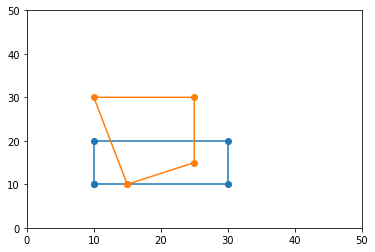

In [127]:
# define P
x = [10, 30, 30, 10]
y = [10, 10, 20, 20]
i = [1] * 4
P = np.array([x, y, i])
# define Phat
x = [15, 25, 25, 10]
y = [10, 15, 30, 30]
Phat = np.array([x, y, i])
# plotting
plot_shape(P)
plot_shape(Phat)


In [106]:
from LS import make_X, make_y, solve_LS, make_H, transform_P

In [129]:
X = make_X(P, Phat)
y = make_y(Phat)
print("P\n", P)
print("Phat\n", Phat)
print("X\n", X)
print("y\n", y)


P
 [[10 30 30 10]
 [10 10 20 20]
 [ 1  1  1  1]]
Phat
 [[15 25 25 10]
 [10 15 30 30]
 [ 1  1  1  1]]
X
 [[  10.   10.    1.    0.    0.    0. -150. -150.]
 [   0.    0.    0.   10.   10.    1. -100. -100.]
 [  30.   10.    1.    0.    0.    0. -750. -250.]
 [   0.    0.    0.   30.   10.    1. -450. -150.]
 [  30.   20.    1.    0.    0.    0. -750. -500.]
 [   0.    0.    0.   30.   20.    1. -900. -600.]
 [  10.   20.    1.    0.    0.    0. -100. -200.]
 [   0.    0.    0.   10.   20.    1. -300. -600.]]
y
 [[15]
 [10]
 [25]
 [15]
 [25]
 [30]
 [10]
 [30]]


In [94]:
beta = solve_LS(X, y)
H = make_H(beta)
print(H)

[[ 0.78571429 -0.71428571 12.14285714]
 [ 0.42857143  0.85714286 -4.28571429]
 [ 0.01428571 -0.02857143  1.        ]]


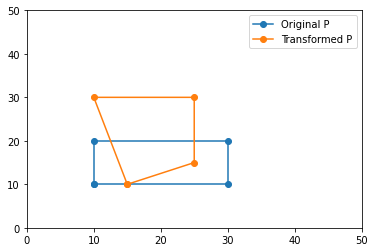

In [130]:
P_trsm = transform_P(P, H)
plot_shape(P, "Original P")
plot_shape(P_trsm, "Transformed P")
plt.legend()

### Transform a real image

In [132]:
import cv2 as cv
from image_handler import load_img, save_img


Dimension:  (1083, 3029, 3)


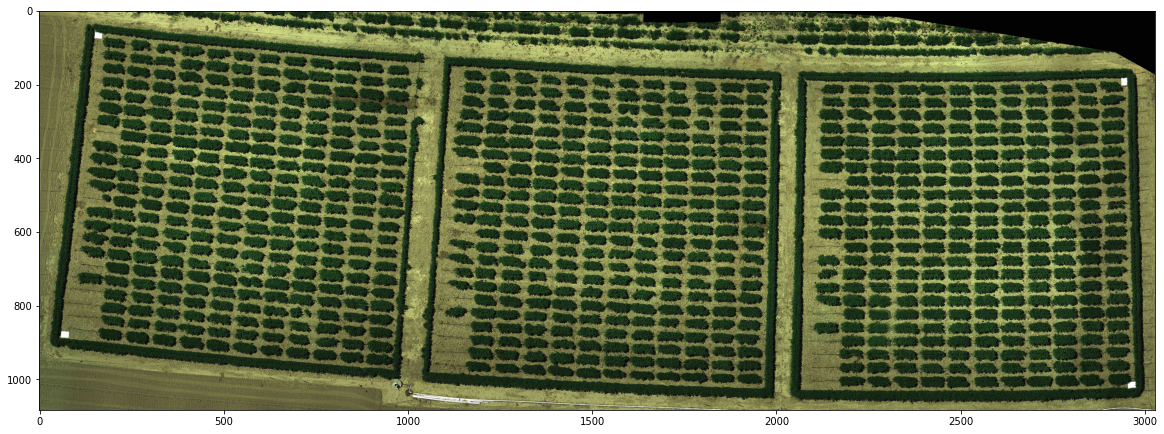

In [197]:
image = load_img("alfalfa.jpg")
plt.figure(figsize=(20, 10))
plt.imshow(image)
print("Dimension: ", image.shape)

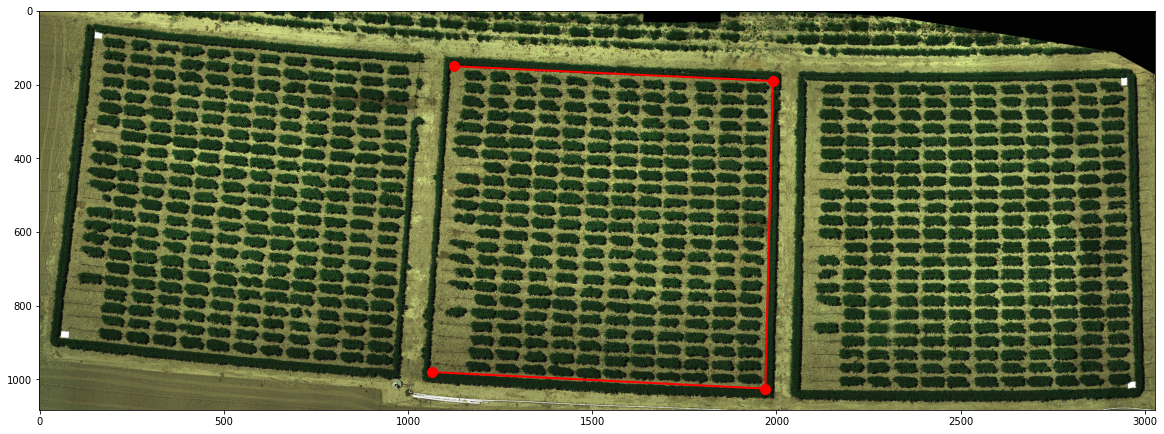

In [200]:
x = [1065, 1970, 1990, 1125]
y = [980, 1025, 190, 150]
plt.figure(figsize=(20, 10))
plt.imshow(image)
plt.plot(x, y, 'o-', linewidth=2, markersize=10, color='red')

In [202]:
P = np.array([x, y, [1] * 4])
h, w = 500, 500
Phat = np.array([[0, w, w, 0],
                 [0, 0, h, h],
                 [1, 1, 1, 1]])
print("P \n", P)
print("Phat \n", Phat)

P 
 [[1065 1970 1990 1125]
 [ 980 1025  190  150]
 [   1    1    1    1]]
Phat 
 [[  0 500 500   0]
 [  0   0 500 500]
 [  1   1   1   1]]


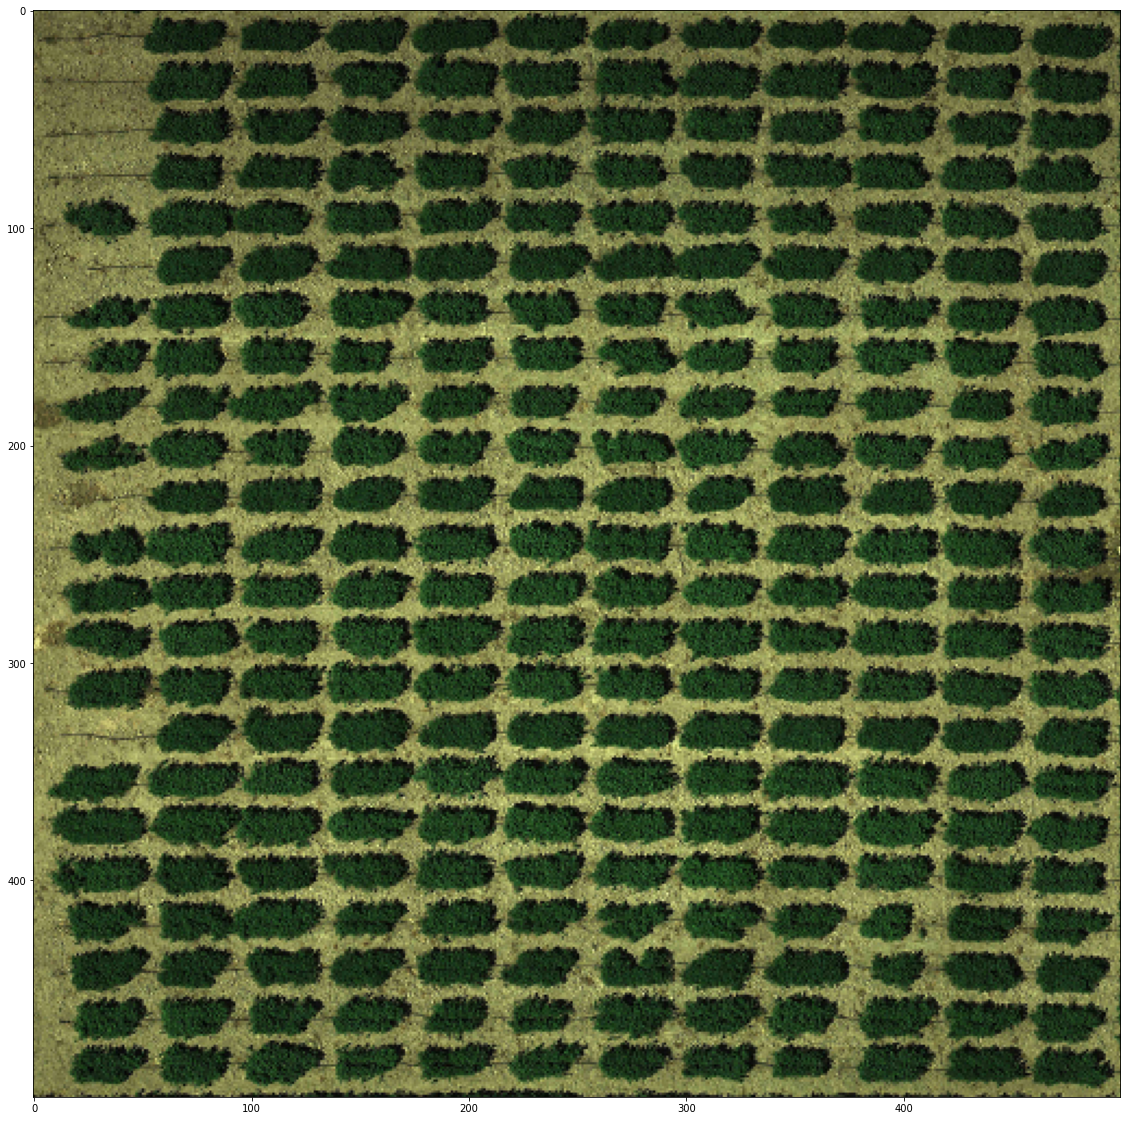

In [204]:
X = make_X(P, Phat)
y = make_y(Phat)
vec_H = solve_LS(X, y)
H = make_H(vec_H)
image_hat = cv.warpPerspective(image.astype(np.float32), H, (500, 500))
image_hat = image_hat.astype(np.uint8)

# plotting
plt.figure(figsize=(20, 20))
plt.imshow(image_hat)